**Abstract**:

In this era where information technology is at its pinnacle, Machine Learning is becoming a very important path for predective modeling. Industries all over the world are interested in this field as it would bring them insights about the enermous data that is being generated and using it to predict their chances of success in new fields. In this project we will use different machine learning classification algorithms to find the accurate algorithm for predicting the response of customers for a new business venture (getting into the field of vehicle insurance) for an existing health insurance company.

**Introduction:**

A health insurance company is looking to make its way into the market providing vehicle insurance. The goal of this project is to compare various classification algorithms to find the one which is more accurate and appropriate for this dataset. Deciding a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company. 

Data Source: https://www.kaggle.com/anmolkumar/health-insurance-cross-sell-prediction

Train Data Shape: 

            Rows- 381109 
            
            Columns - 12





**Motivation:**

This dataset is from Kaggle hackathon. The challenge here is to evaluate different classification models inorder to predict the most appropriate class. This will give me an opportunity to explore different algorithms and see the results. This dataset has a class imbalance problem that encouraged me to address this problem.


**Related work and References:**



1.  https://elitedatascience.com/imbalanced-classes

2.  https://stackoverflow.com/questions/54052471/mapping-values-in-place-for-example-with-gender-from-string-to-int-in-pandas-d

3. https://stackoverflow.com/questions/50325786/sci-kit-learn-how-to-print-labels-for-confusion-matrix

4. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

5. https://www.kaggle.com/anmolkumar/vehicle-insurance-eda-lgbm-vs-catboost-85-83




**Proposed Method**:

The following classifiers used in the problem:

1. Logistic Regression.
2. Gaussian Naive Bayes.
3. K nearest neighbours.
4. Random Forest Classifier.

The method used to handle class imbalance in this problem is upscaling.


In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


Importing Libraries.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.utils import resample,shuffle
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.metrics import plot_confusion_matrix


Reading the data.

In [3]:
train_df= pd.read_csv("/content/gdrive/My Drive/insurance_dataset/train.csv",index_col=None)
train_df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


Mapping the data.

In [4]:
# Replacing the Male and Female variable to 0 and 1. 
train_df['Gender'].replace(['Male','Female'],[0,1],inplace=True)
#Mapping Yes and No to 1 and 0.
train_df['Vehicle_Damage'].replace(['Yes','No'],[1,0],inplace=True)
#Mapping the Vehicle_age to integers.
train_df['Vehicle_Age'].replace(['< 1 Year','1-2 Year','> 2 Years'],[1,2,3],inplace=True)

Splitting the data into train and test dataframes.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(train_df.drop(['Response'],axis=1),train_df['Response'], test_size=0.20, random_state=1)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(304887, 11) (76222, 11) (304887,) (76222,)


Initializing a dictionary to store the results of every model.

In [6]:
eval_dict={}

**Experiments:** 

Evaluting all the models on the train and test dataset.

In [7]:
#Random Forest Classifier
Rfc= RandomForestClassifier()
Rfc.fit(X_train, y_train)
 
#Predict on testing set
y_pred= Rfc.predict(X_test)
 


In [8]:
eval_dict['RandomForest']={}
eval_dict['RandomForest']['Correctly zero classified']=confusion_matrix(y_test,y_pred)[0][0]
eval_dict['RandomForest']['Correctly one classified']=confusion_matrix(y_test,y_pred)[1][1]
eval_dict['RandomForest']['Total number of missclassified']=confusion_matrix(y_test,y_pred)[0][1]+confusion_matrix(y_test,y_pred)[1][0]
eval_dict['RandomForest']['Accuracy Score']=accuracy_score(y_test,y_pred)
#printing the confusion matrix and accuracy score.
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[65896  1156]
 [ 8488   682]]
0.8734748497809032


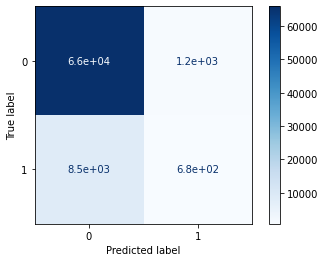

In [9]:
#plotting the confusion matrix.
plot_confusion_matrix(Rfc, X_test, y_test,
                                 display_labels=[0,1],
                                 cmap=plt.cm.Blues)

In [10]:
#Logistic Regression
logistic_model=LogisticRegression()
logistic_model.fit(X_train,y_train)
y_pred=logistic_model.predict(X_test)


In [11]:
#printing the Confusion matrix and Accuracy score 
print(confusion_matrix(y_test,y_pred))
print("Accuracy score:-", accuracy_score(y_test,y_pred))

[[67052     0]
 [ 9170     0]]
Accuracy score:- 0.8796935268032852


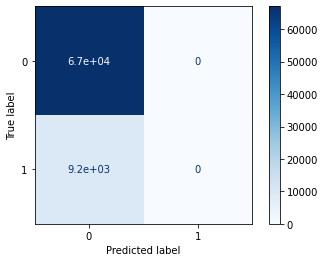

In [12]:
#plotting the confusion matrix.
plot_confusion_matrix(logistic_model, X_test, y_test,
                                 display_labels=[0,1],
                                 cmap=plt.cm.Blues)

In [13]:
eval_dict['LogisticRegression']={}
eval_dict['LogisticRegression']['Correctly zero classified']=confusion_matrix(y_test,y_pred)[0][0]
eval_dict['LogisticRegression']['Correctly one classified']=confusion_matrix(y_test,y_pred)[1][1]
eval_dict['LogisticRegression']['Total number of missclassified']=confusion_matrix(y_test,y_pred)[0][1]+confusion_matrix(y_test,y_pred)[1][0]
eval_dict['LogisticRegression']['Accuracy Score']=accuracy_score(y_test,y_pred)

In [14]:
#GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
#print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

In [15]:
#printing the Confusion matrix and Accuracy score 
confusion_matrix(y_test,y_pred)
accuracy_score(y_test,y_pred)

0.878197895620687

In [16]:
eval_dict['GaussianNB']={}
eval_dict['GaussianNB']['Correctly zero classified']=confusion_matrix(y_test,y_pred)[0][0]
eval_dict['GaussianNB']['Correctly one classified']=confusion_matrix(y_test,y_pred)[1][1]
eval_dict['GaussianNB']['Total number of missclassified']=confusion_matrix(y_test,y_pred)[0][1]+confusion_matrix(y_test,y_pred)[1][0]
eval_dict['GaussianNB']['Accuracy Score']=accuracy_score(y_test,y_pred)

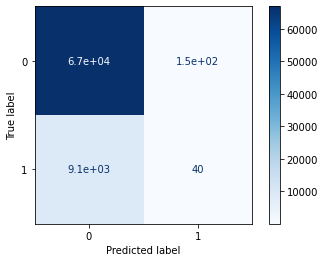

In [17]:
#plotting the confusion matrix.
plot_confusion_matrix(gnb, X_test, y_test,
                                 display_labels=[0,1],
                                 cmap=plt.cm.Blues)

Here we are using grid search to get the best parameters for KNN so that we can train the model with suggested parameters to get more accuracy.

In [18]:
#KNN Classifier
pipe = Pipeline(steps=[('knn',KNeighborsClassifier())])
param_grid= {
    
    'knn__n_neighbors': [1,3,5,7],
    'knn__metric': ['manhattan', 'euclidean'],
    'knn__weights': ['uniform', 'distance']
    
}
gs = GridSearchCV(pipe, param_grid, cv = 5)
gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('knn',
                                        KNeighborsClassifier(algorithm='auto',
                                                             leaf_size=30,
                                                             metric='minkowski',
                                                             metric_params=None,
                                                             n_jobs=None,
                                                             n_neighbors=5, p=2,
                                                             weights='uniform'))],
                                verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'knn__metric': ['manhattan', 'euclidean'],
                         'knn__n_neighbors': [1, 3, 5, 7],
                         'knn__weights': ['uniform', 'distance']},
             pre_dispatch='2*n_j

In [19]:
gs.best_estimator_

Pipeline(memory=None,
         steps=[('knn',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='manhattan', metric_params=None,
                                      n_jobs=None, n_neighbors=7, p=2,
                                      weights='uniform'))],
         verbose=False)

In [20]:
knn=KNeighborsClassifier(n_neighbors=7,metric='manhattan',weights='uniform')
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)

In [21]:
#printing the confusion matrix and accuracy score.
print(accuracy_score(y_test,y_pred))
confusion_matrix(y_test,y_pred)

0.8753509485450395


array([[66641,   411],
       [ 9090,    80]])

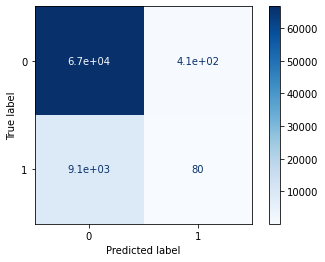

In [22]:
#plotting the confusion matrix.
plot_confusion_matrix(knn, X_test, y_test,
                                 display_labels=[0,1],
                                 cmap=plt.cm.Blues)

In [23]:
eval_dict['KNeighborsClassifier']={}
eval_dict['KNeighborsClassifier']['Correctly zero classified']=confusion_matrix(y_test,y_pred)[0][0]
eval_dict['KNeighborsClassifier']['Correctly one classified']=confusion_matrix(y_test,y_pred)[1][1]
eval_dict['KNeighborsClassifier']['Total number of missclassified']=confusion_matrix(y_test,y_pred)[0][1]+confusion_matrix(y_test,y_pred)[1][0]
eval_dict['KNeighborsClassifier']['Accuracy Score']=accuracy_score(y_test,y_pred)

# Handling the imbalance class problem by upsampling the data.

In [24]:
Maj_df = train_df[train_df['Response']==0]
Min_df = train_df[train_df['Response']==1]
Min_df_upsampled = resample(Min_df,replace=True,n_samples=334399,random_state = 0)
balanced_df = pd.concat([Min_df_upsampled,Maj_df])
balanced_df = shuffle(balanced_df)
balanced_df.Response.value_counts()

1    334399
0    334399
Name: Response, dtype: int64

In [25]:
X1_train, X1_test, y1_train, y1_test = train_test_split(balanced_df.drop(['Response'],axis=1),balanced_df['Response'], test_size=0.20, random_state=1)
print(X1_train.shape,X1_test.shape,y1_train.shape,y1_test.shape)

(535038, 11) (133760, 11) (535038,) (133760,)


In [26]:
# Random Forest Claasifier
RFC1 = RandomForestClassifier()
RFC1.fit(X1_train, y1_train)
 
# Predict on training set
y1_pred= RFC1.predict(X1_test)

In [27]:
eval_dict['RandomForestClassifier_Balanced']={}
eval_dict['RandomForestClassifier_Balanced']['Correctly zero classified']=confusion_matrix(y1_test,y1_pred)[0][0]
eval_dict['RandomForestClassifier_Balanced']['Correctly one classified']=confusion_matrix(y1_test,y1_pred)[1][1]
eval_dict['RandomForestClassifier_Balanced']['Total number of missclassified']=confusion_matrix(y1_test,y1_pred)[0][1]+confusion_matrix(y1_test,y1_pred)[1][0]
eval_dict['RandomForestClassifier_Balanced']['Accuracy Score']=accuracy_score(y1_test,y1_pred)

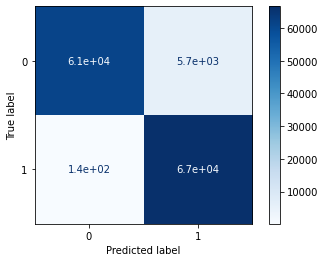

In [28]:
#plotting the confusion matrix.
plot_confusion_matrix(RFC1, X1_test, y1_test,
                                 display_labels=[0,1],
                                 cmap=plt.cm.Blues)

In [29]:
#printing the confusion matrix and accuracy score.
print(confusion_matrix(y1_test,y1_pred))
print(accuracy_score(y1_test, y1_pred))

[[61338  5651]
 [  136 66635]]
0.9567359449760765


In [30]:
#logisticregression
logistic_model=LogisticRegression()
logistic_model.fit(X1_train,y1_train)
y1_pred=logistic_model.predict(X1_test)

In [31]:
#printing the confusion matrix and accuracy score.
print(confusion_matrix(y1_test,y1_pred))
print(accuracy_score(y1_test, y1_pred))

[[47443 19546]
 [35553 31218]]
0.5880756578947368


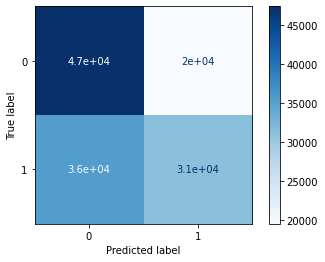

In [32]:
#plotting the confusion matrix.
plot_confusion_matrix(logistic_model, X1_test, y1_test,
                                 display_labels=[0,1],
                                 cmap=plt.cm.Blues)

In [33]:
eval_dict['LogisticRegression_Balanced']={}
eval_dict['LogisticRegression_Balanced']['Correctly zero classified']=confusion_matrix(y1_test,y1_pred)[0][0]
eval_dict['LogisticRegression_Balanced']['Correctly one classified']=confusion_matrix(y1_test,y1_pred)[1][1]
eval_dict['LogisticRegression_Balanced']['Total number of missclassified']=confusion_matrix(y1_test,y1_pred)[0][1]+confusion_matrix(y1_test,y1_pred)[1][0]
eval_dict['LogisticRegression_Balanced']['Accuracy Score']=accuracy_score(y1_test,y1_pred)

In [ ]:
#GaussianNB
gnb = GaussianNB()
y1_pred = gnb.fit(X1_train, y1_train).predict(X1_test)

In [35]:
#printing the confusion matrix and accuracy score.
print(confusion_matrix(y1_test,y1_pred))
print(accuracy_score(y1_test, y1_pred))

[[41409 25580]
 [23920 42851]]
0.6299342105263158


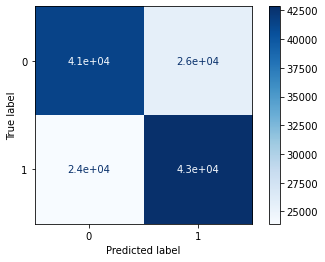

In [36]:
#plotting the confusion matrix.
plot_confusion_matrix(gnb, X1_test, y1_test,
                                 display_labels=[0,1],
                                 cmap=plt.cm.Blues)

In [37]:
eval_dict['GaussianNB_Balanced']={}
eval_dict['GaussianNB_Balanced']['Correctly zero classified']=confusion_matrix(y1_test,y1_pred)[0][0]
eval_dict['GaussianNB_Balanced']['Correctly one classified']=confusion_matrix(y1_test,y1_pred)[1][1]
eval_dict['GaussianNB_Balanced']['Total number of missclassified']=confusion_matrix(y1_test,y1_pred)[0][1]+confusion_matrix(y1_test,y1_pred)[1][0]
eval_dict['GaussianNB_Balanced']['Accuracy Score']=accuracy_score(y1_test,y1_pred)

In [38]:
#KNN classifier.
pipe = Pipeline(steps=[('knn',KNeighborsClassifier())])
param_grid= {
    
    'knn__n_neighbors': [1,3,5,7],
    'knn__metric': ['manhattan', 'euclidean'],
    'knn__weights': ['uniform', 'distance']
    
}
gs = GridSearchCV(pipe, param_grid, cv = 5)
gs.fit(X1_train, y1_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('knn',
                                        KNeighborsClassifier(algorithm='auto',
                                                             leaf_size=30,
                                                             metric='minkowski',
                                                             metric_params=None,
                                                             n_jobs=None,
                                                             n_neighbors=5, p=2,
                                                             weights='uniform'))],
                                verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'knn__metric': ['manhattan', 'euclidean'],
                         'knn__n_neighbors': [1, 3, 5, 7],
                         'knn__weights': ['uniform', 'distance']},
             pre_dispatch='2*n_j

In [39]:
gs.best_estimator_

Pipeline(memory=None,
         steps=[('knn',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='manhattan', metric_params=None,
                                      n_jobs=None, n_neighbors=1, p=2,
                                      weights='uniform'))],
         verbose=False)

In [40]:
knn=KNeighborsClassifier(n_neighbors=1,metric='manhattan',weights='uniform')
knn.fit(X1_train,y1_train)
y_pred=knn.predict(X1_test)
#printing the confusion matrix and accuracy score.
print(accuracy_score(y1_test,y1_pred))
confusion_matrix(y1_test,y1_pred)

0.6299342105263158


array([[41409, 25580],
       [23920, 42851]])

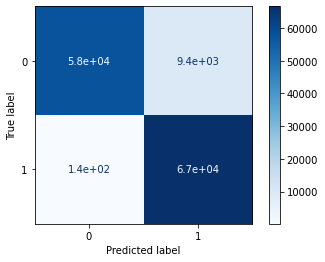

In [41]:
#plotting the confusion matrix.
plot_confusion_matrix(knn, X1_test, y1_test,
                                 display_labels=[0,1],
                                 cmap=plt.cm.Blues)

In [44]:
eval_dict['KNeighborsClassifier_Balanced']={}
eval_dict['KNeighborsClassifier_Balanced']['Correctly zero classified']=confusion_matrix(y1_test,y1_pred)[0][0]
eval_dict['KNeighborsClassifier_Balanced']['Correctly one classified']=confusion_matrix(y1_test,y1_pred)[1][1]
eval_dict['KNeighborsClassifier_Balanced']['Total number of missclassified']=confusion_matrix(y1_test,y1_pred)[0][1]+confusion_matrix(y1_test,y1_pred)[1][0]
eval_dict['KNeighborsClassifier_Balanced']['Accuracy Score']=accuracy_score(y1_test,y1_pred)

Making a dataframe from the dictionary along with the results of each classifier.

In [45]:
pd.DataFrame.from_dict(eval_dict, orient='index')

,Correctly zero classified,Correctly one classified,Total number of missclassified,Accuracy Score
RandomForest,65896,682,9644,0.873475
LogisticRegression,67052,0,9170,0.879694
GaussianNB,66898,40,9284,0.878198
KNeighborsClassifier,66641,80,9501,0.875351
RandomForestClassifier_Balanced,61338,66635,5787,0.956736
LogisticRegression_Balanced,47443,31218,55099,0.588076
GaussianNB_Balanced,41409,42851,49500,0.629934
KNeighborsClassifier_Balanced,41409,42851,49500,0.629934


**Results:**

This is a classic example where accuracy of these algorithms is not the primary metric to assess the success of the model. The data has one class in access as compared to the other class i.e. the response 'Yes' are almost half or less a scompared to response 'No'. This creates a class imbalance. The models will give good accuracy as it can predict one class but as there are not enough samples of the other class it wont be able to predict the other class. Thus, it is very important to address the class imbalance as both positive and negative classes are important.The classifier that performed well with class imblaance was Gaussian Naive Bayes. According to the given results Random Forest Classifier with balanced class is the best performer as it has the least amount of missclassified samples (from the confusion matrix) and highest accuracy score. Where as other models displayed alot of missclassified samples after class imbalance was addressed.

**Conclusion:**

Data analysis is important aspect as it gives more insight about data. Accuracy is not the correct metric to assess this problem. Class imbalance has to be addressed first. The method we used to address class imbalance in this problem was upscaling. The balanced model that performed well was RandomForest classifier.  

**Future Work and limitation:**

The limitation in this project is that we have only used a few models. Also, the test data set provided by the source has no reference to check if the reponses which we are fetting are accurate or not. There are other methods for handling class imbalance which have not been displayed here. They can have different results for different classification algorithms that can be tested further on this dataset.
